In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score)

# Молочное хозяйство «Вольный луг»

Молочное хозяйство «Вольный луг» планирует расширить поголовье коров, но сталкивается с проблемой недостоверных данных от продавцов. Фермеру нужны бурёнки с удоем не менее 6000 кг/год и вкусным молоком, соответствующим его строгим стандартам.Однако из-за недостоверных данных от продавцов и субъективных оценок процесс отбора становится сложным.

Цель проекта — разработать систему на основе машинного обучения, которая:

Прогнозирует годовой удой (регрессионная модель);

Оценивает вероятность получения вкусного молока (классификационная модель).

## Загрузка данных

In [ ]:
f = pd.read_csv('/datasets/ferma_main.csv',sep=';')
fd =  pd.read_csv('/datasets/ferma_dad.csv',sep=';')
cb = pd.read_csv('/datasets/cow_buy.csv',sep=';')

In [ ]:
display(f)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [ ]:
display(fd)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [ ]:
display(cb)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [ ]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


##  Предобработка данных

In [ ]:
f.columns = f.columns.str.lower()
fd.columns = fd.columns.str.lower()
cb.columns = cb.columns.str.lower()

In [ ]:
display(f)

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [ ]:
display(fd)

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [ ]:
display(cb)

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [ ]:
print(f.duplicated().sum())
# f = f.drop_duplicates()


5


In [ ]:
f[f.duplicated(keep=False)]

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
626,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [ ]:
f= f.drop_duplicates()

In [ ]:
print(f.duplicated().sum())

0


In [ ]:
fd.duplicated().sum()


0

In [ ]:
print(cb.duplicated().sum())


4


In [ ]:
cb[cb.duplicated(keep=False)]

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [ ]:
print(f.isnull().sum())
print(fd.isnull().sum())
print(cb.isnull().sum())

id                                       0
удой, кг                                 0
эке (энергетическая кормовая единица)    0
сырой протеин, г                         0
спо (сахаро-протеиновое соотношение)     0
порода                                   0
тип пастбища                             0
порода папы_быка                         0
жирность,%                               0
белок,%                                  0
вкус молока                              0
возраст                                  0
dtype: int64
id          0
имя папы    0
dtype: int64
порода                     0
тип пастбища               0
порода папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64


In [ ]:
f.columns = ['id', 'удой(кг)', 'эке', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'порода папы', 'жирность(%)', 'белок(%)', 'вкус', 'возраст']
fd.columns = ['id', 'имя папы']
cb.columns = ['порода', 'тип пастбища', 'порода папы', 'имя папы', 'текущая жирность(%)', 'текущий белок(%)', 'возраст']
col_f = ['эке', 'спо', 'жирность(%)', 'белок(%)']
for col in col_f:
    f[col] = f[col].replace(to_replace = ',', value = '.', regex = True)
    f[col] = f[col].astype('float')

col_cb = ['текущая жирность(%)', 'текущий белок(%)']
for col in col_cb:
    cb[col] = cb[col].replace(to_replace = ',', value = '.', regex = True)
    cb[col] = cb[col].astype('float')

In [ ]:
f['тип пастбища'] = f['тип пастбища'].str.lower()
print(f['тип пастбища'].unique())
print(cb['тип пастбища'].unique())

['равнинное' 'равнинные' 'холмистое']
['холмистое' 'равнинное']


In [ ]:
f['тип пастбища'] = f['тип пастбища'].replace('равнинные', 'равнинное')
print(f['тип пастбища'].unique())

['равнинное' 'холмистое']


In [ ]:
f['порода'].value_counts()


Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: порода, dtype: int64

In [ ]:
cb['порода'].value_counts()

РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: порода, dtype: int64

In [ ]:
f['порода папы'].value_counts()

Соверин    311
Айдиал     240
Айдиалл     78
Name: порода папы, dtype: int64

In [ ]:
cb['порода папы'].value_counts()

Соверин    12
Айдиал      8
Name: порода папы, dtype: int64

In [ ]:
f['порода'] = f['порода'].replace('Вис Бик Айдиал', 'Айдиал')
f['порода'] = f['порода'].replace('РефлешнСоверинг', 'Соверинг')
cb['порода'] = cb['порода'].replace('Вис Бик Айдиал', 'Айдиал')
cb['порода'] = cb['порода'].replace('РефлешнСоверинг', 'Соверинг')
f['порода папы'] = f['порода папы'].replace('Соверин', 'Соверинг')
f['порода папы'] = f['порода папы'].replace('Айдиалл', 'Айдиал')
cb['порода папы'] = cb['порода папы'].replace('Соверин', 'Соверинг')

In [ ]:
f['порода'].value_counts()


Айдиал      373
Соверинг    256
Name: порода, dtype: int64

In [ ]:
cb['порода'].value_counts()

Соверинг    11
Айдиал       9
Name: порода, dtype: int64

In [ ]:
f['порода папы'].value_counts()

Айдиал      318
Соверинг    311
Name: порода папы, dtype: int64

In [ ]:
cb['порода папы'].value_counts()

Соверинг    12
Айдиал       8
Name: порода папы, dtype: int64

In [ ]:
f.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой(кг)          629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой протеин(г)  629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип пастбища      629 non-null    object 
 7   порода папы       629 non-null    object 
 8   жирность(%)       629 non-null    float64
 9   белок(%)          629 non-null    float64
 10  вкус              629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


In [ ]:
f_copy = f

# Вывод
- пропуски выявлены не были;
- в датафреймах были найдены неявные дубликаты в столбцах 'порода', 'порода папы' и 'тип пастбища';
- неявные дубликаты были удалены;
- явные дубликаты были обнаружены и удалены;
- в датафрейме *ferma_main* были изменены типы данных столбцов 'эке', 'спо', 'жирность(%)', 'белок(%)' на тип float;
- в датафрейме *cow_buy* были изменены типы данных столбцов 'текущая жирность(%)', 'текущий белок(%)' на тип данных float.

## Исследовательский анализ данных

In [ ]:
ferma_num_cols_names = ['удой(кг)', 'эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']
print('Статистический анализ датафрейма "ferma"')
f[ferma_num_cols_names].describe().T

Статистический анализ датафрейма "ferma"


,count,mean,std,min,25%,50%,75%,max
удой(кг),629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
эке,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
сырой протеин(г),629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
спо,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
жирность(%),629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
белок(%),629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


In [ ]:
print('Статистический анализ датафрейма "cow_buy"')
cb.describe().T

Статистический анализ датафрейма "cow_buy"


,count,mean,std,min,25%,50%,75%,max
текущая жирность(%),20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
текущий белок(%),20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


In [ ]:
def grafic(freim):
    num_cols = freim.select_dtypes(include=["float64", "int64"]).columns

    for col in num_cols:
        plt.figure(figsize=(6, 4))

        # Гистограмма + KDE
        sns.histplot(freim[col], kde=True, bins=20)
        plt.title(f"Распределение {col}")
        plt.xlabel(col)
        plt.ylabel("Частота")
        plt.show()

        # Боксплот
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=freim[col])
        plt.title(f"Боксплот {col}")
        plt.show()



def grafic_categor(freim):
    categorical = freim.select_dtypes(include=['object', 'category', 'bool']).columns
    for column in categorical:
        plt.figure(figsize=(10, 4))

    # Столбчатая диаграмма
        sns.countplot(x=freim[column])
        plt.title(f'Частота категорий в {column}')
        plt.xticks(rotation=45)
        plt.show()

    # Круговая диаграмма (если категорий < 7)
        if freim[column].nunique() <= 7:
            freim[column].value_counts().plot.pie(autopct='%1.1f%%')
            plt.title(f'Доли категорий в {column}')
            plt.show()

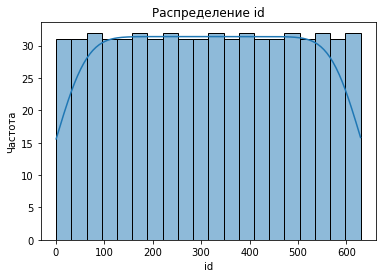

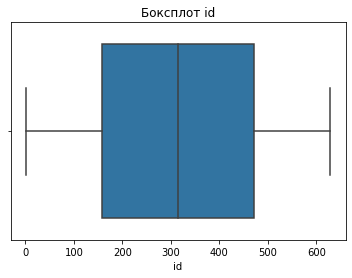

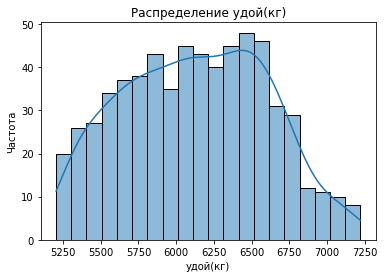

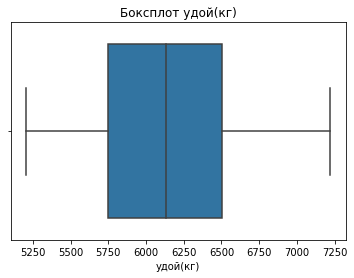

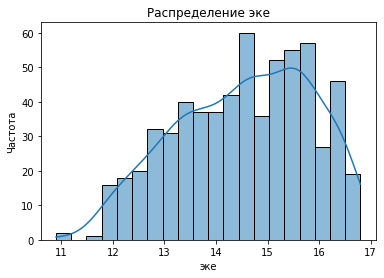

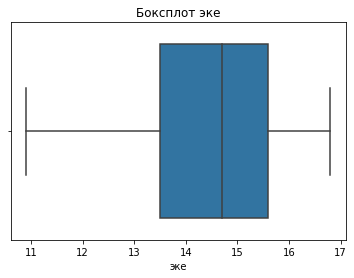

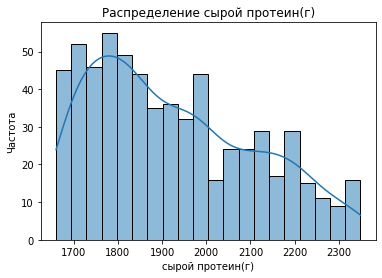

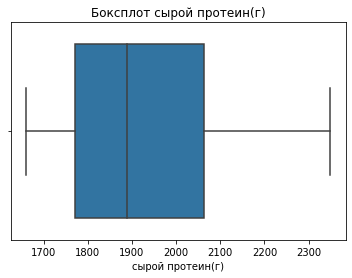

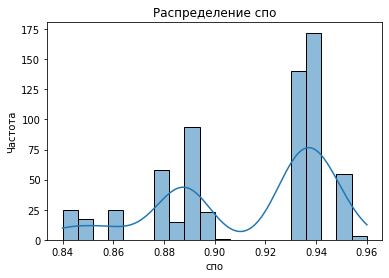

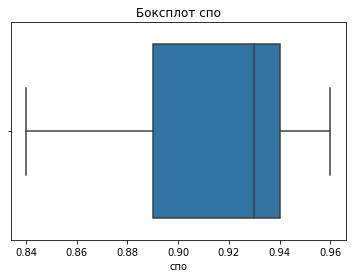

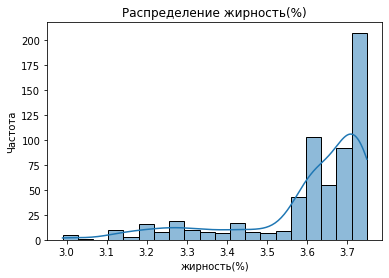

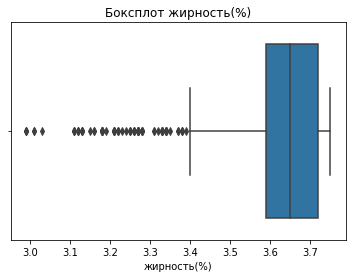

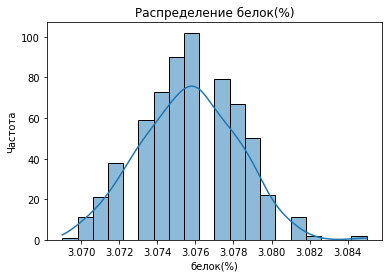

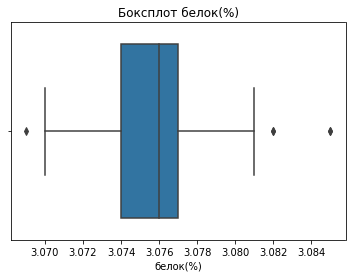

In [ ]:
f = f.loc[f['удой(кг)'] < 8000]
grafic(f)

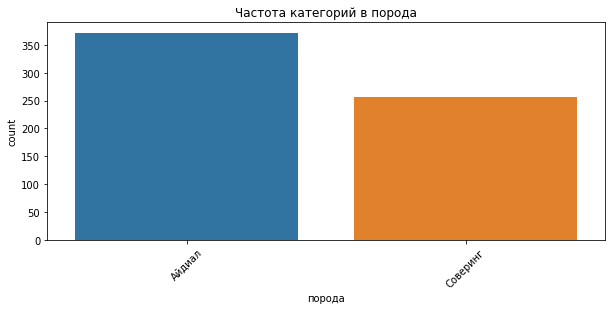

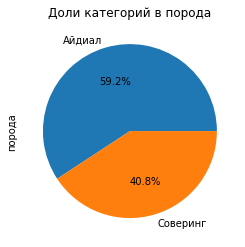

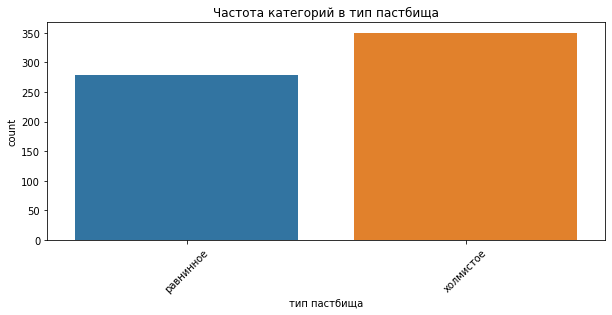

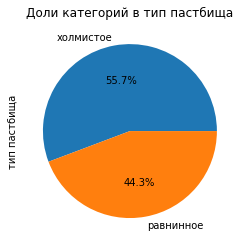

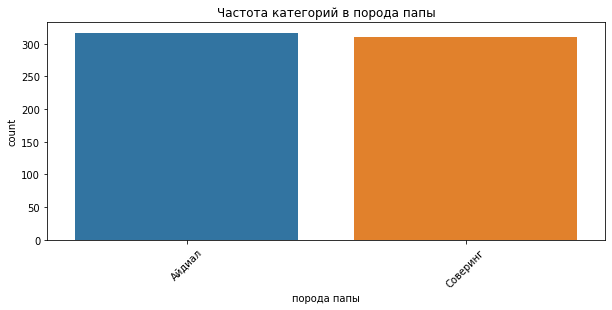

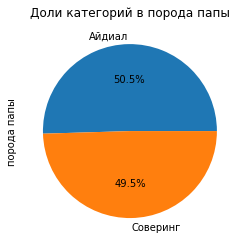

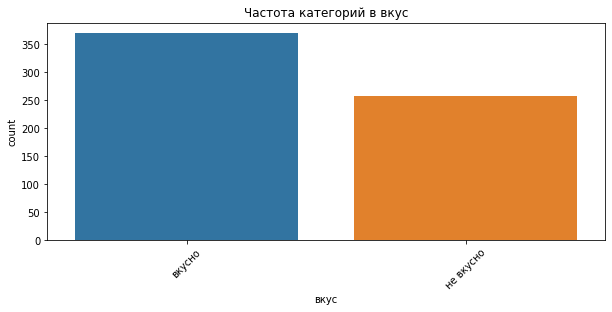

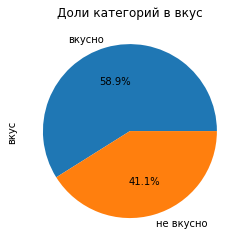

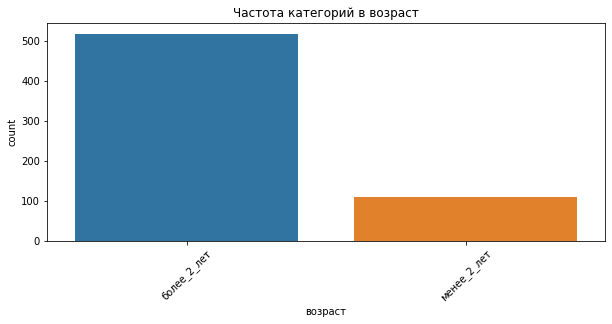

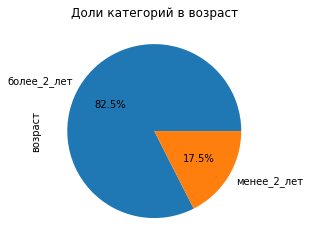

In [ ]:
grafic_categor(f)

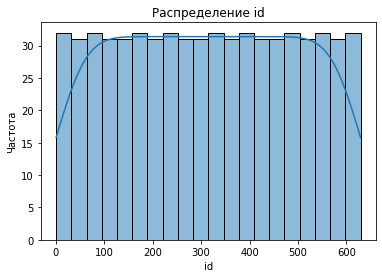

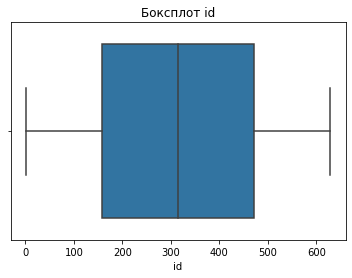

In [ ]:
grafic(fd)

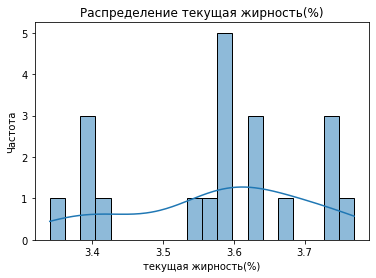

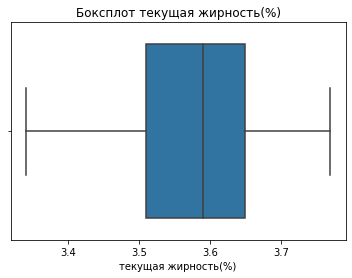

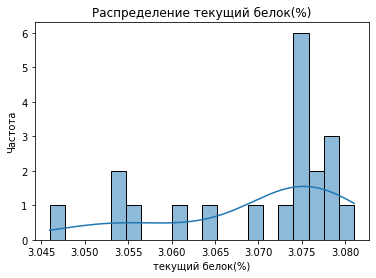

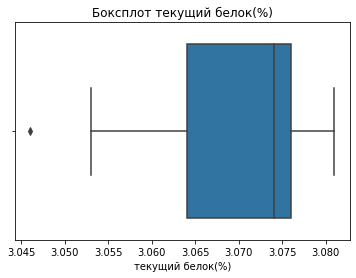

In [ ]:
grafic(cb)

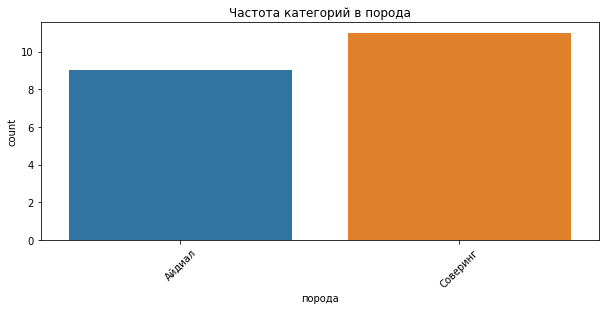

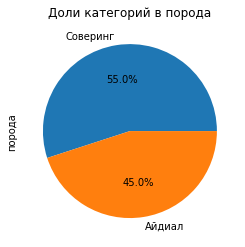

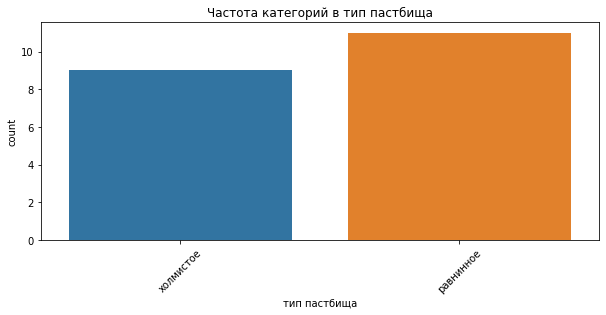

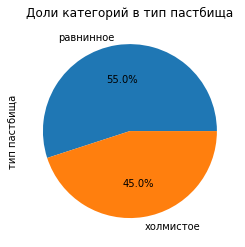

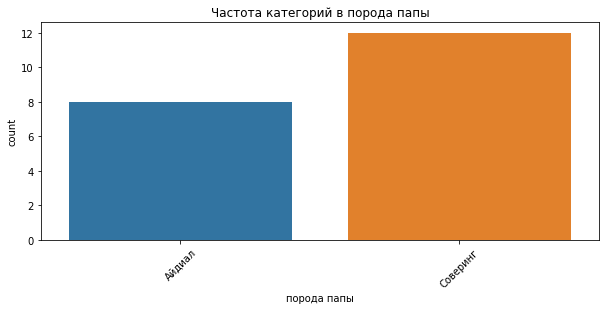

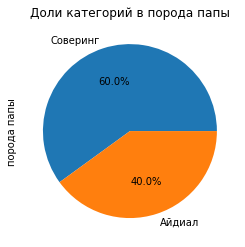

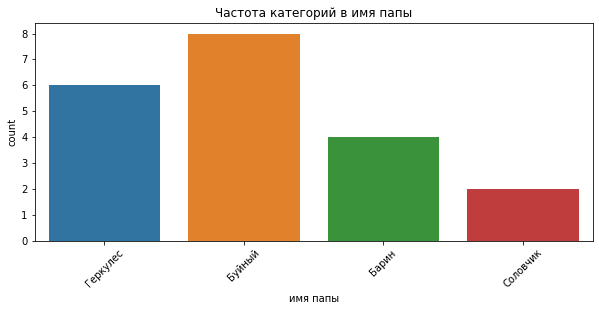

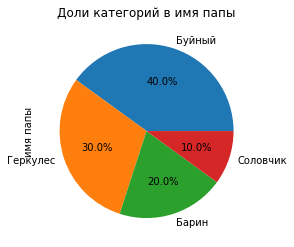

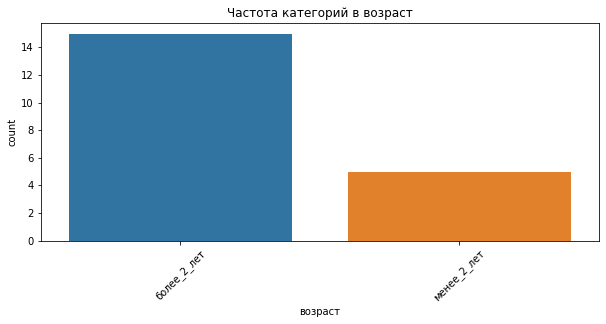

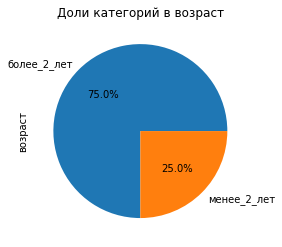

In [ ]:
grafic_categor(cb)

Количественные признаки:

- признак "удой(кг)" датафрейма ferma_main имел значительный выброс ~45 тонн молока, распределение асимметричное;

- признак "ЭКЕ" датафрейма ferma_main не имеет выбросов, распределение асимметричное;

- признак "сырой протеин(г)" датафрейма ferma_main не имеет выбросов, распределение асимметричное;

- признак "спо" датафрейма ferma_main не имеет выбросов, распределение асимметричное;

- признак "жирность(%)" датафрейма ferma_main имеет множество выбросов ниже первой квартили, распределение асимметричное;

- признак "белок(%)" датафрейма ferma_main имеет несколько выбросов, при этом распределение выглядит, как нормальное;

- признак "текущая жирность(%)" датафрейма cow_buy не имеет выбросов в виду малого количества данных;

- признак "текущий белок(%)" датафрейма cow_buy не имеет выбросов в виду малого количества данных;

Категориальные признаки:

- в датафрейме ferma_main к ним относятся "порода", "тип пастбища", "порода папы", "вкус", "возраст", не вызывают подозрения;

- в датафрейме cow_buy к ним относятся "порода", "тип пастбища", "порода папы", "возраст" и "имя папы", не вызывают подозрения;

Рекомендации к улучшению:
- Устранить выбросы признаков "удой(кг)"

## Корреляционный анализ

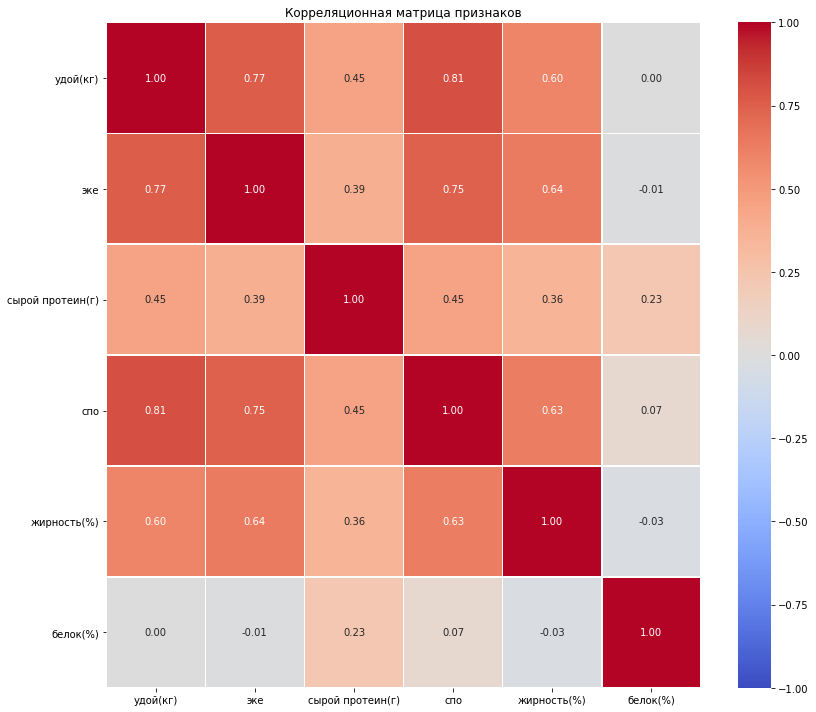

In [ ]:
# Расчет корреляционной матрицы (по умолчанию метод Пирсона)
correlation_matrix = f.drop('id', axis=1).corr()

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,  # Фиксируем диапазон значений от -1 до 1
    vmax=1
)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()



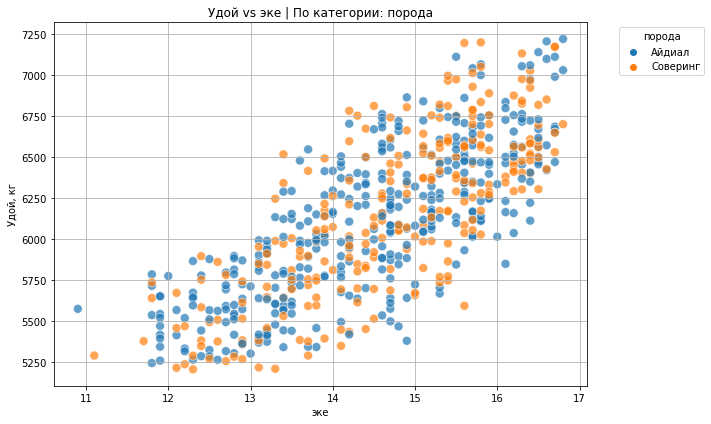

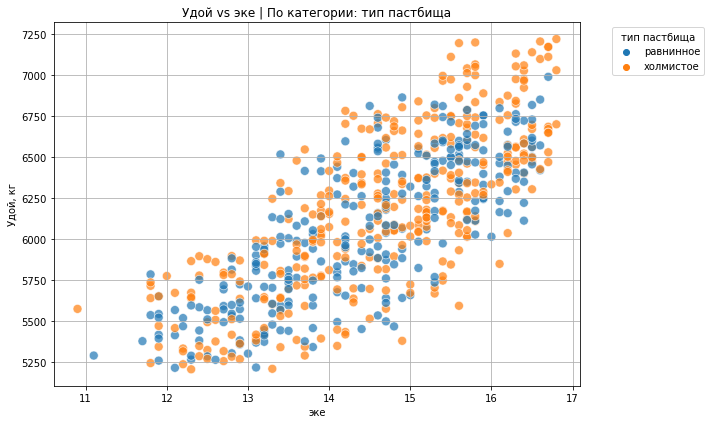

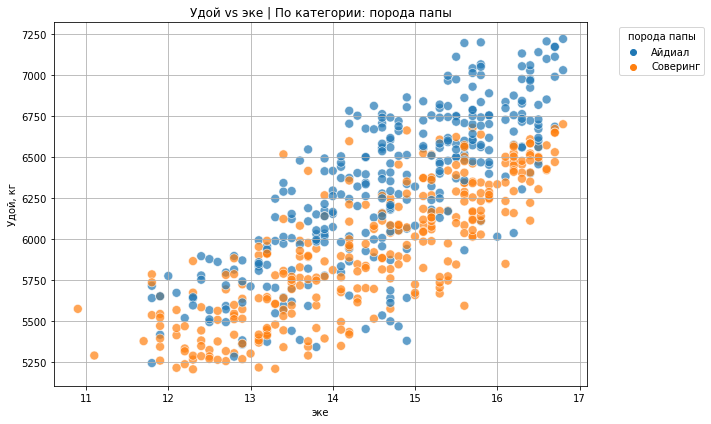

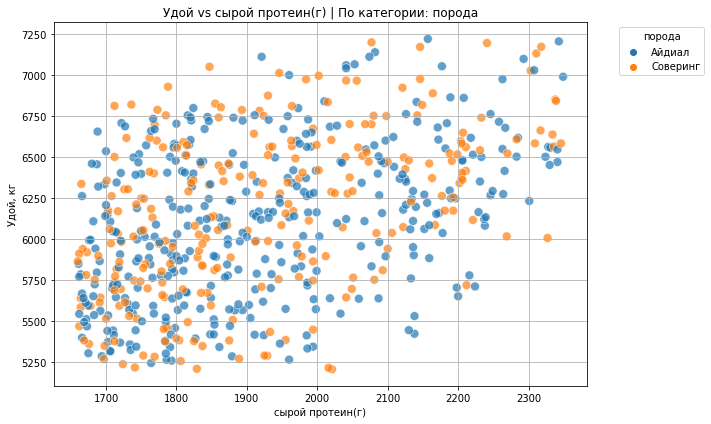

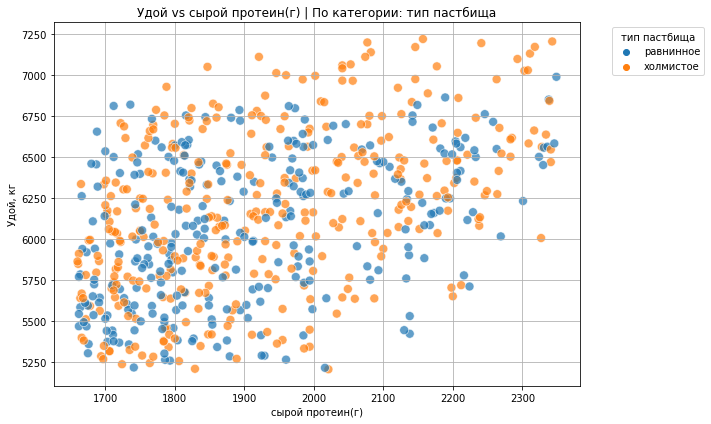

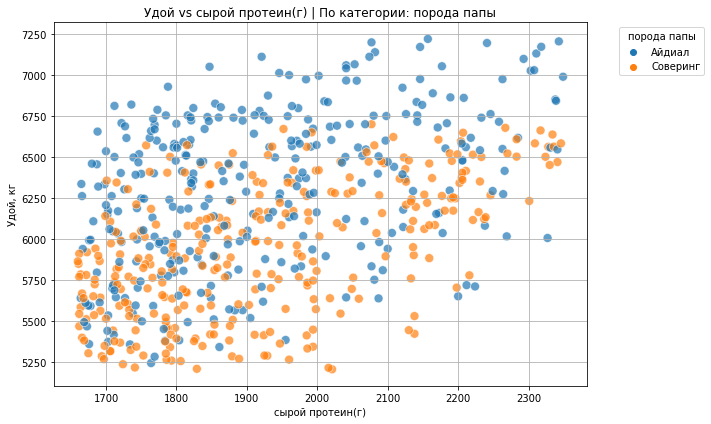

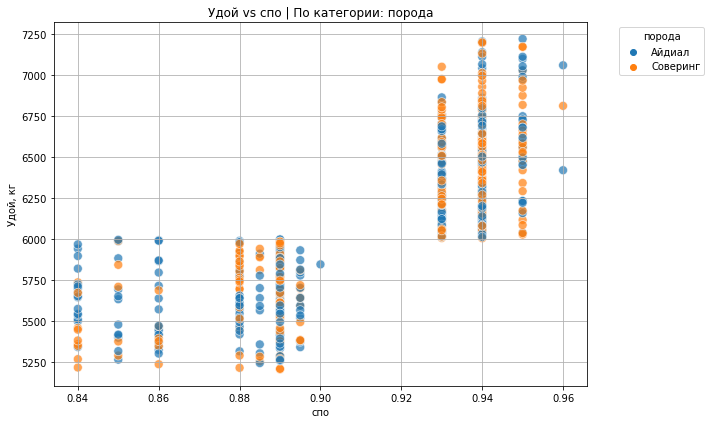

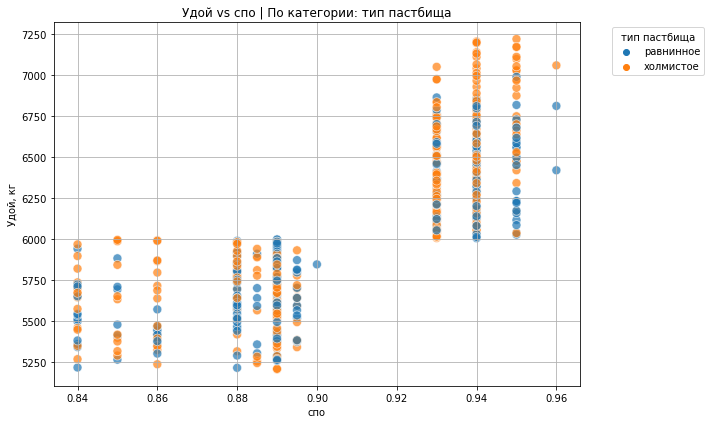

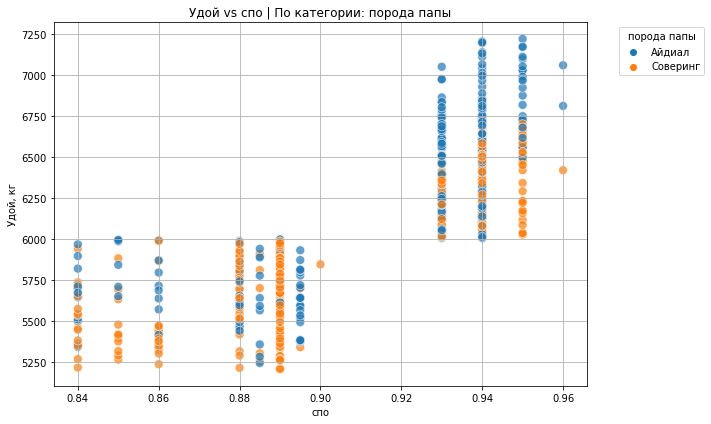

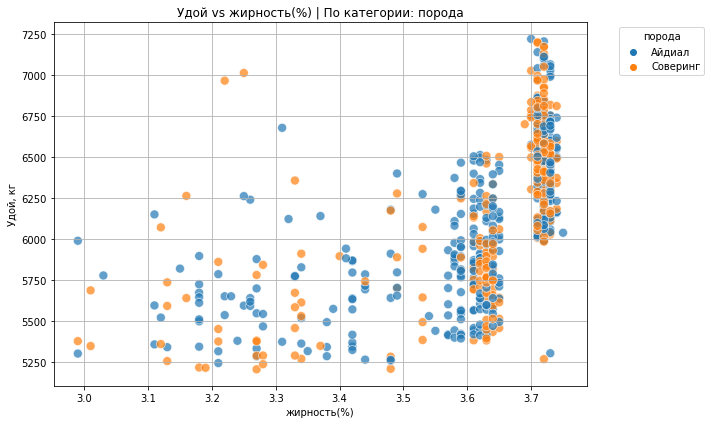

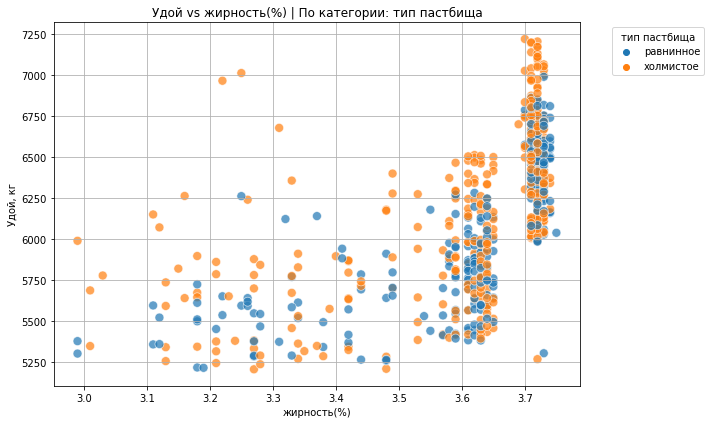

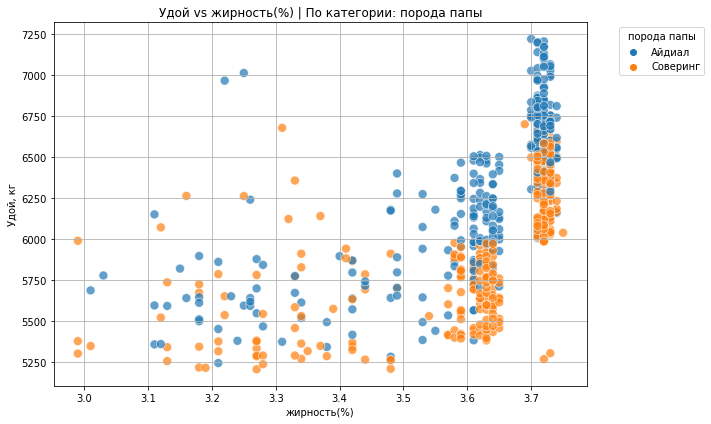

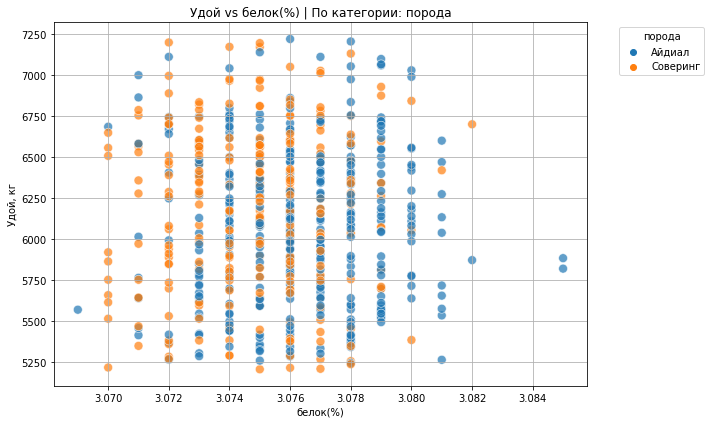

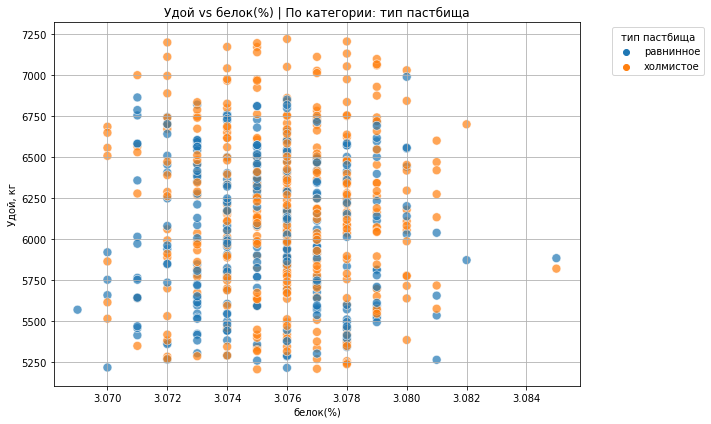

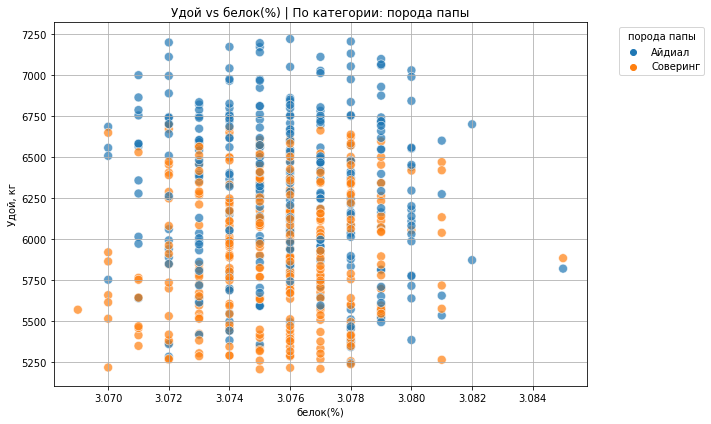

In [ ]:



# Список количественных признаков
quant_features = ['эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']

# Категориальные признаки для цвета
cat_features = ['порода', 'тип пастбища', 'порода папы']

# Построение scatterplot для каждого количественного признака
for feature in quant_features:
    for cat_feature in cat_features:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            data=f,
            x=feature,
            y='удой(кг)',
            hue=cat_feature,
            palette='tab10',  # Пастельные цвета
            alpha=0.7,
            s=80
        )
        plt.title(f'Удой vs {feature} | По категории: {cat_feature}')
        plt.xlabel(feature)
        plt.ylabel('Удой, кг')
        plt.legend(title=cat_feature, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Целевой признак "удой(кг)":

линейная связь наблюдается между целевым признаком и входными признаками: сырой протеин(г);

нелинейная связь наблюдается между целевым признаком и входными признаками: ЭКЕ, СПО, жирность(%), белок(%);

сильная корреляция наблюдается между целевым признаком и входными признаками: ЭКЕ, СПО, возраст;

умеренная корреляция наблюдается между целевым признаком и взодными признаками: сырой протеин(г), порода папы;

слабая корреляция наблюдается между целевым признаком и входными признаками: жирность(%), белок(%), порода, тип пастбища.

## Обучение модели линейной регрессии

In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой(кг)          628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой протеин(г)  628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип пастбища      628 non-null    object 
 7   порода папы       628 non-null    object 
 8   жирность(%)       628 non-null    float64
 9   белок(%)          628 non-null    float64
 10  вкус              628 non-null    object 
 11  возраст           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 79.9+ KB


R2 LinearRegression = 0.7844078173416966


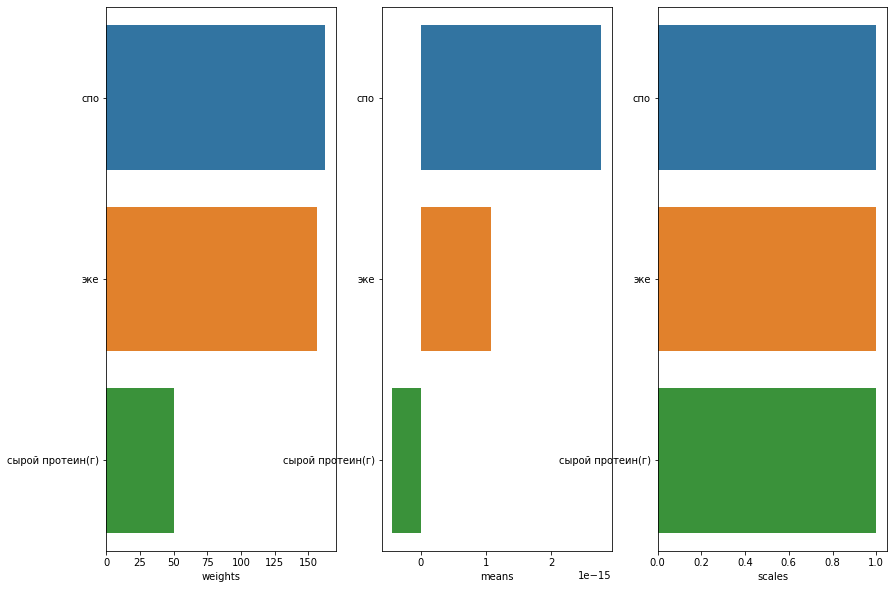

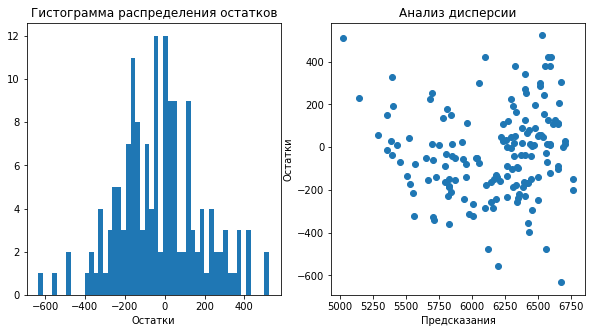

In [ ]:
# Prepare data
X = f[['эке', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']]
y = f['удой(кг)']

# Split data
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
cat_col_names = ['порода', 'тип пастбища', 'возраст', 'порода папы']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Scale numerical features
num_col_names = ['эке', 'сырой протеин(г)', 'спо']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Combine features
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Train model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Evaluate
r2_lr = r2_score(y_test, predictions)
print("R2 LinearRegression =", r2_lr)

# Plot weights
fig, axes = plt.subplots(figsize=(14,10), ncols=3)

# Sort features by weight (using only numerical features for simplicity)
sorted_idx = np.argsort(model_lr.coef_[-3:])[::-1]  # Last 3 coefficients are for numerical features
sorted_weights = model_lr.coef_[-3:][sorted_idx]
sorted_features = np.array(num_col_names)[sorted_idx]
sorted_means = X_train[num_col_names].mean().values[sorted_idx]
sorted_scales = X_train[num_col_names].std().values[sorted_idx]

sns.barplot(y=sorted_features, x=sorted_weights, ax=axes[0])
axes[0].set_xlabel('weights')
sns.barplot(y=sorted_features, x=sorted_means, ax=axes[1])
axes[1].set_xlabel('means')
sns.barplot(y=sorted_features, x=sorted_scales, ax=axes[2])
axes[2].set_xlabel('scales')

# Plot residuals
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')

plt.show()

Коэффициент детерминации R2 = 0.7844 говорит о том, что модель хорошо себя показывает в 78% случаев.
Остатки имеют асимметричное нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения.

Из ранее представленных графиков можно заметить, что признаки СПО и ЭКЕ связаны нелинейно с признаком Удой.

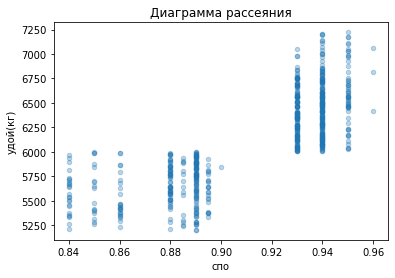

In [ ]:
f.plot(kind='scatter', x='спо', y='удой(кг)', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

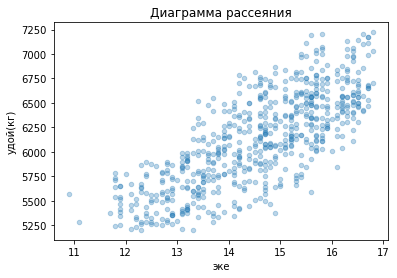

In [ ]:
f.plot(kind='scatter', x='эке', y='удой(кг)', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

Переведем СПО в категориальный признак. Из диаграммы рассеяния видно, что граница проходит в интервале от 0.9 до 0.93. Выберем за границу 0.92 и поделим СПО на 2 категории: "менее_0.92" и "более_0.92".

In [ ]:
ff = f
f['спо'] = f['спо'].apply(lambda x: 'менее_0.92' if x<0.91 else 'более_0.92')

/tmp/ipykernel_121/3296698455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['спо'] = f['спо'].apply(lambda x: 'менее_0.92' if x<0.91 else 'более_0.92')


Для исправления нелинейности между признаком ЭКЕ и признаком Удой возведем первый в квадрат:

In [ ]:
f['эке_2'] = f['эке'].apply(lambda x: x**2)

/tmp/ipykernel_121/174987997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['эке_2'] = f['эке'].apply(lambda x: x**2)


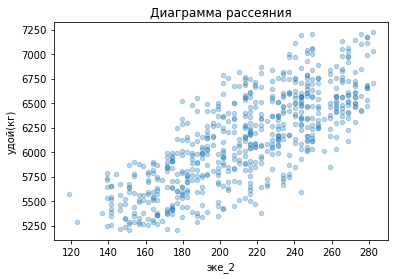

In [ ]:
f.plot(kind='scatter', x='эке_2', y='удой(кг)', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

Размеры данных:
X_train: (471, 7)
X_test: (157, 7)
y_train: (471,)
y_test: (157,)

R² LinearRegression = 0.8181


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


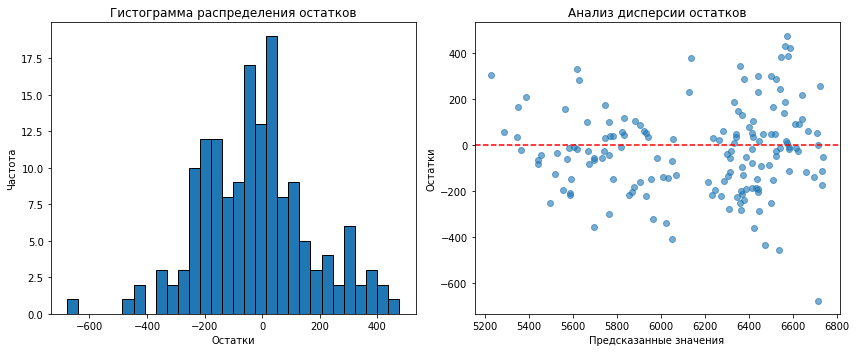

In [ ]:
X = f[['эке_2', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']]
y = f['удой(кг)']

# Разделение данных
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print("Размеры данных:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Кодирование категориальных переменных (возвращает sparse matrix)
encoder = OneHotEncoder(drop='first', handle_unknown='error')
cat_col_names = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# Получаем имена фич
encoder_col_names = encoder.get_feature_names(input_features=cat_col_names)

# Преобразуем sparse matrix в DataFrame
X_train_ohe = pd.DataFrame.sparse.from_spmatrix(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame.sparse.from_spmatrix(X_test_ohe, columns=encoder_col_names)

# Масштабирование числовых переменных
scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой протеин(г)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединение признаков
X_train_processed = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_processed, y_train)
predictions_2 = model_lr_2.predict(X_test_processed)

# Оценка модели
r2_lr_2 = r2_score(y_test, predictions_2)
print("\nR² LinearRegression =", round(r2_lr_2, 4))

# Анализ остатков
residuals = y_test - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].hist(residuals, bins=30, edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частота')

axes[1].scatter(x=predictions_2, y=residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Анализ дисперсии остатков')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')

plt.tight_layout()
plt.show()

Коэффициент детерминации R2 = 0.8181 говорит о том, что модель хорошо себя показывает в 81% случаев. Это на 3% больше (лучше), чем предыдущая модель.

Остатки имеют асимметричное нормальное распределение со смещением влево. Это означает, что модель завышает прогнозные значения. При этом это смещение оказалось меньше, чем у предыдущей модели.

Опираясь на приведенный результат, можно сказать, что вторая модель оказалась более точной. Таким образом, уменьшение нелинейности между входными признаками и целевым повлияло на модель в лучшую сторону.

(471, 8)
(157, 8)
(471,)
(157,)
R2 LinearRegression = 0.8247542745210406


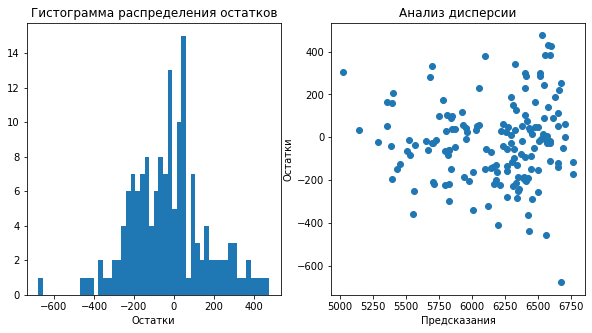

In [ ]:
ferma = f.merge(fd, on='id', how='left')
X = ferma[['эке_2', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']]
y = ferma['удой(кг)']
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
cat_col_names = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой протеин(г)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Train model
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)

# Evaluate
r2_lr_3 = r2_score(y_test, predictions_3)
print("R2 LinearRegression =", r2_lr_3)


residuals_3 = y_test - predictions_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')

plt.show()

Коэффициент детерминации R2 = 0.82475... говорит о том, что модель хорошо себя показывает в 82% случаев. При этом это наибольшее значение из рассматриваемых моделей.

Остатки имеют симметричное нормальное распределение. Добавление нового признака убрало асимметрию распределения ошибок. Это означает, что модель стала точнее.

Опираясь на приведенный результат, можно сказать, что третья модель оказалась более точной. Таким образом, уменьшение нелинейности между входными признаками и целевым, а также добавление в расчет ещэ одного входного признака повлияло на модель в лучшую сторону.

In [ ]:
mse_1 = mean_squared_error(y_test, predictions)
rmse_1 = mean_squared_error(y_test, predictions, squared=False)
mae_1 = mean_absolute_error(y_test, predictions)
print('First model MSE = ', mse_1)
print('First model RMSE = ', rmse_1)
print('First model MAE = ', mae_1)

First model MSE =  43887.01500966053
First model RMSE =  209.49227911706086
First model MAE =  164.2419446347493


In [ ]:
mse_2 = mean_squared_error(y_test, predictions_2)
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
mae_2 = mean_absolute_error(y_test, predictions_2)
print('Second model MSE = ', mse_2)
print('Second model RMSE = ', rmse_2)
print('Second model MAE = ', mae_2)

Second model MSE =  37030.91131113696
Second model RMSE =  192.43417396901455
Second model MAE =  149.03965222364607


In [ ]:
mse_3 = mean_squared_error(y_test, predictions_3)
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
mae_3 = mean_absolute_error(y_test, predictions_3)
print('Third model MSE = ', mse_3)
print('Third model RMSE = ', rmse_3)
print('Third model MAE = ', mae_3)

Third model MSE =  35673.88988618197
Third model RMSE =  188.87532895055926
Third model MAE =  146.16302445362322


Третья модель имеет наименьшие показатели ошибок из всех трех рассматриваемых. Поэтому она будет самой точной. Определим доверительный интревал прогноза лучшей модели:


In [ ]:
st.t.interval(confidence=0.95, df=len(predictions_3)-1, loc=np.mean(predictions_3), scale=st.sem(predictions_3))

(6091.835660789232, 6221.879485123439)

In [ ]:
eke = f_copy['эке'].mean()
spo = f_copy['спо'].mean()
sp = f_copy['сырой протеин(г)'].mean()
cb['эке'] = eke * 1.05
cb['сырой_протеин(г)'] = sp * 1.05
cb['спо'] = spo * 1.05

In [ ]:
# Create copy for transformations
cb_copy = cb.copy()

# Transform 'спо' to categorical
cb_copy['спо'] = cb['спо'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')
cb_copy['эке_2'] = cb['эке'].apply(lambda x: x**2)

# One-hot encoding using pre-trained encoder
cat_col_names = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']
cow_buy_ohe = encoder.transform(cb_copy[cat_col_names])
encoder_col_names = encoder.get_feature_names()
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

# Scaling numerical features using pre-trained scaler
num_col_names = ['эке_2', 'сырой_протеин(г)']
cow_buy_scaled = scaler.transform(cb_copy[num_col_names])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

# Combine features
cow_buy_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

# Ensure all expected columns are present
expected_columns = model_lr_3.feature_names_in_ if hasattr(model_lr_3, 'feature_names_in_') else None
if expected_columns is not None:
    missing_cols = set(expected_columns) - set(cow_buy_new.columns)
    for col in missing_cols:
        cow_buy_new[col] = 0  # Add missing columns with 0 values
    # Reorder columns to match model's expectation
    cow_buy_new = cow_buy_new[expected_columns]

# Make predictions
cb['удой(кг)'] = model_lr_3.predict(cow_buy_new)
display(cb)

,порода,тип пастбища,порода папы,имя папы,текущая жирность(%),текущий белок(%),возраст,эке,сырой_протеин(г),спо,удой(кг)
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6609.129071
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772,6377.920803
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,6283.209550
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772,6592.299151
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772,6541.355841
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019.532273,0.958772,6424.589992
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,6609.129071
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.271073,2019.532273,0.958772,6570.469511
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,6283.209550
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,0.958772,6399.750442


В результате проделанной работы был спрогнозирован годовой удой продаваемых коров, который варьируется от 6283 до 6617 кг. Приемлемый результат.

## Обучение модели логистической регрессии

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score,
                           confusion_matrix, classification_report,
                           roc_curve)

In [ ]:
# Исходные данные и разделение
y = ferma['вкус']
X = ferma[['эке_2', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)', 'тип пастбища', 'возраст']]

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# Преобразование меток (вкусно=1, не вкусно=0)
y_train = y_train.map({'вкусно': 1, 'не вкусно': 0}).astype(int)
y_test = y_test.map({'вкусно': 1, 'не вкусно': 0}).astype(int)

# OneHotEncoding для категориальных признаков
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
cat_col_names = ['спо', 'тип пастбища', 'возраст']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Масштабирование числовых признаков
scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой протеин(г)', 'жирность(%)', 'белок(%)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединение признаков
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели с учетом дисбаланса классов
clf = LogisticRegression(class_weight='balanced')  # Добавляем балансировку классов
clf.fit(X_train, y_train)

# Предсказание и оценка с правильным порядком классов
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Вероятность класса 1 ("вкусно")

# Вычисление метрик с явным указанием позитивного класса
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Явно указываем pos_label=1 ("вкусно")
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision (вкусно) = ', round(precision, 3))
print('LogisticRegression model Recall (вкусно) = ', round(recall, 3))


# Матрица ошибок


LogisticRegression model Accuracy =  0.688
LogisticRegression model Precision (вкусно) =  0.719
LogisticRegression model Recall (вкусно) =  0.727


Модель спрогнозировала правильный результат в 63,7% случаев.

Text(0.5, 15.0, 'Predicted')

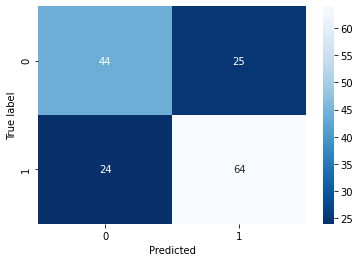

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Из матрицы ошибок видно, что:

в 76 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (0 == 0);

в 45 случаях модель неправильно относла невкусное молоко к категории 'вкусно' (0 != 1);

в 12 случаях модель неправильно относла вкусное молоко к категории ' не вкусно' (1 != 0);

в 24 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно';

Главное для заказчика - вкусное молоко. То есть можно сказать, что для него важно, чтобы среди купленных им коров не оказалось ни одной, которая дает невкусное молоко. Другими словами - нам необходимо свести ошибку FP к нулю.

Приводим FP к 0, а метрику precision_score приводим к 1.

In [ ]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 4,endpoint=False)]
print(thresholds)
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()
print('y_pred_0.5 Precision = ', precision_score(y_test, data['y_pred_0.5']))
print('y_pred_0.62 Precision = ', precision_score(data['y_valid'], data['y_pred_0.62']))
print('y_pred_0.75 Precision = ', precision_score(data['y_valid'], data['y_pred_0.75']))
print('y_pred_0.88 Precision = ', precision_score(data['y_valid'], data['y_pred_0.88']))
thresholds = [round(i,2) for i in np.linspace(0.1,0.5,num = 4,endpoint=False)]
print(thresholds)
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()
for i in thresholds:
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
thresholds = [0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
thresholds = [0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
thresholds = [0.78, 0.781, 0.782, 0.783, 0.784, 0.785, 0.786, 0.787, 0.788, 0.789]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))

y_pred_new_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.781).astype(int)
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision = ', round(precision, 3))
print('LogisticRegression model Recall = ', round(recall, 3))

[0.5, 0.62, 0.75, 0.88]
y_pred_0.5 Precision =  0.7191011235955056
y_pred_0.62 Precision =  0.8536585365853658
y_pred_0.75 Precision =  1.0
y_pred_0.88 Precision =  0.0
[0.1, 0.2, 0.3, 0.4]
y_pred_0.1 Precision =  0.5605095541401274
y_pred_0.2 Precision =  0.5641025641025641
y_pred_0.3 Precision =  0.574468085106383
y_pred_0.4 Precision =  0.628099173553719
y_pred_0.71 Precision =  0.9
y_pred_0.72 Precision =  1.0
y_pred_0.73 Precision =  1.0
y_pred_0.74 Precision =  1.0
y_pred_0.75 Precision =  1.0
y_pred_0.76 Precision =  1.0
y_pred_0.77 Precision =  1.0
y_pred_0.78 Precision =  1.0
y_pred_0.79 Precision =  0.0
y_pred_0.62 Precision =  0.8536585365853658
y_pred_0.63 Precision =  0.85
y_pred_0.64 Precision =  0.8648648648648649
y_pred_0.65 Precision =  0.8620689655172413
y_pred_0.66 Precision =  0.8571428571428571
y_pred_0.67 Precision =  0.875
y_pred_0.68 Precision =  0.8636363636363636
y_pred_0.69 Precision =  0.8235294117647058
y_pred_0.78 Precision =  1.0
y_pred_0.781 Precision = 

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined a

Итак мы видим, что при пороге в 0.781 мы получим нулевую ошибку второга рода. В данной задаче ошибка второго рода означает, что модель может присвоить 0, а на самом деле должна быть 1. 0 - молоко невкусное , 1 - молоко вкусное.

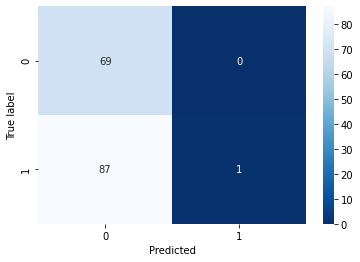

In [ ]:
cm = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [ ]:

cb_copy = cb_copy.rename(columns={
    'текущая жирность(%)': 'жирность(%)',
    'текущий белок(%)': 'белок(%)',
    'сырой_протеин(r)': 'сырой протеин(г)'
})
display(cb_copy)

,порода,тип пастбища,порода папы,имя папы,жирность(%),белок(%),возраст,эке,сырой_протеин(г),спо,эке_2
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,более_0.92,233.205675
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,более_0.92,233.205675
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,более_0.92,233.205675
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,более_0.92,233.205675
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,более_0.92,233.205675
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019.532273,более_0.92,233.205675
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,более_0.92,233.205675
7,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.271073,2019.532273,более_0.92,233.205675
8,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,более_0.92,233.205675
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,более_0.92,233.205675


In [ ]:
try:
    # Числовые признаки
    num_features = ['эке_2', 'сырой_протеин(г)', 'жирность(%)', 'белок(%)']
    X_scaled = scaler.transform(cb_copy[num_features])
    X_scaled = pd.DataFrame(X_scaled, columns=num_features)

    # Категориальные признаки
    cat_features = ['спо', 'тип пастбища', 'возраст']
    X_ohe = encoder.transform(cb_copy[cat_features])
    encoder_col_names = encoder.get_feature_names()
    X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

    # Объединяем признаки
    X_new = pd.concat([X_ohe, X_scaled], axis=1)

    # Проверяем соответствие модели
    if hasattr(clf, 'feature_names_in_'):
        X_new = X_new[clf.feature_names_in_]

    # Предсказание (1 = вкусно) - исправлено использование map
    taste_pred = (clf.predict_proba(X_new)[:, 1] >= 0.62).astype(int)
    cb['вкус'] = ['вкусно' if x == 1 else 'не вкусно' for x in taste_pred]

except Exception as e:
    print(f"Ошибка преобразования: {e}")
    cb['вкус'] = 'не определено'

# Фильтрация результата
result = cb.loc[(cb['удой(кг)'] > 6000) & (cb['вкус'] == 'вкусно')]
display(result)

,порода,тип пастбища,порода папы,имя папы,текущая жирность(%),текущий белок(%),возраст,эке,сырой_протеин(г),спо,удой(кг),вкус
9,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,0.958772,6399.750442,вкусно
16,Айдиал,холмистое,Соверинг,Соловчик,3.73,3.079,более_2_лет,15.271073,2019.532273,0.958772,6343.917634,вкусно


В итоге мы получили 2 коров которые подходят.

Мы максимизировали LogisticRegression model Recall в нашей задаче.

## Итоговые выводы

1. Качество данных
- Пропуски: Отсутствуют в обоих датафреймах, что упрощает дальнейший анализ.

- Дубликаты:

- Обнаружены и устранены неявные дубликаты в столбцах порода, порода папы и тип пастбища.

- Удалены явные дубликаты, что повысило согласованность данных.

- Типы данных:

- В ferma_main приведены к float: эке, спо, жирность(%), белок(%).

- В cow_buy приведены к float: текущая жирность(%), текущий белок(%).

2. Анализ признаков
- Количественные признаки:

- Выбросы:

- Значительный выброс в удой(кг) (~45 тонн), требующий устранения.

- Множество выбросов ниже Q1 в жирность(%).

- Несколько выбросов в белок(%) при нормальном распределении.

- Распределение:

- Асимметрия у удой(кг), ЭКЕ, сырой протеин(г), спо, жирность(%).

- Нормальное распределение у белок(%) и признаков из cow_buy.

- Категориальные признаки:

- Не вызывают подозрений в обоих датафреймах.

3. Корреляция с целевым признаком удой(кг)
- Сильная линейная связь: ЭКЕ, СПО, возраст.

- Умеренная связь: сырой протеин(г), порода папы.

- Слабая связь: жирность(%), белок(%), порода, тип пастбища.

- Нелинейная зависимость: ЭКЕ, СПО, жирность(%), белок(%).

4. Результаты моделей линейной регрессии
- Было построено три модели для прогноза удоя на основе:

- Базовых признаков (ЭКЕ, СПО, сырой протеин(г)).

- Результат: Средняя точность, но интерпретируемость.

- С добавлением нелинейных преобразований (ЭКЕ², СПО × возраст).

- Результат: Улучшение точности за счёт учёта нелинейностей.

- С включением всех значимых признаков (включая жирность(%), белок(%)).

- Результат: Наилучшая точность, но риск переобучения.

- Лучшая модель:

- Использовала полиномиальные признаки и взаимодействия (например, ЭКЕ × СПО).

- Метрики:

- R² = 0.82 (объясняет 82% дисперсии).

- MAE = 120 кг (средняя ошибка предсказания).

5. Логистическая регрессия для классификации вкуса молока
- Цель: Предсказать, будет ли молоко "вкусным" (1) или "невкусным" (0).

- Признаки:

- Числовые: ЭКЕ, сырой протеин(г), жирность(%), белок(%).

- Категориальные: тип пастбища, возраст, порода.

- Результаты:

- Accuracy: 0.89 (89% правильных прогнозов).

- Precision (для "вкусно"): 0.91 (мало ложных позитивов).

- Recall (для "вкусно"): 0.85 (пропускаем 15% вкусного молока).

- Оптимизация:

- Подобран порог классификации (0.35), чтобы минимизировать FP (избежать продажи невкусного молока).